# Set up workspace

In [ ]:
import sys
sys.path.append('../')

In [2]:
%matplotlib inline
import pickle
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analyze_data import grab_cmip_dataset
from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.generate_figures import quick_map

In [4]:
from plants_and_TCR.generate_figures import plot_allmaps_run

In [5]:
DIR_FIGURES = directory_information.DIR_OUTPUT_FIGURES
DIR_DICTS = directory_information.DIR_DATA_DICTIONARIES
cmip_dict = pickle.load(open(DIR_DICTS+'cmip_dict.pickle',"rb"))

# Maps for All Models

In [14]:
VARNAME='tas'
END_YR=70

AttributeError: 'IndexVariable' object has no attribute 'year'

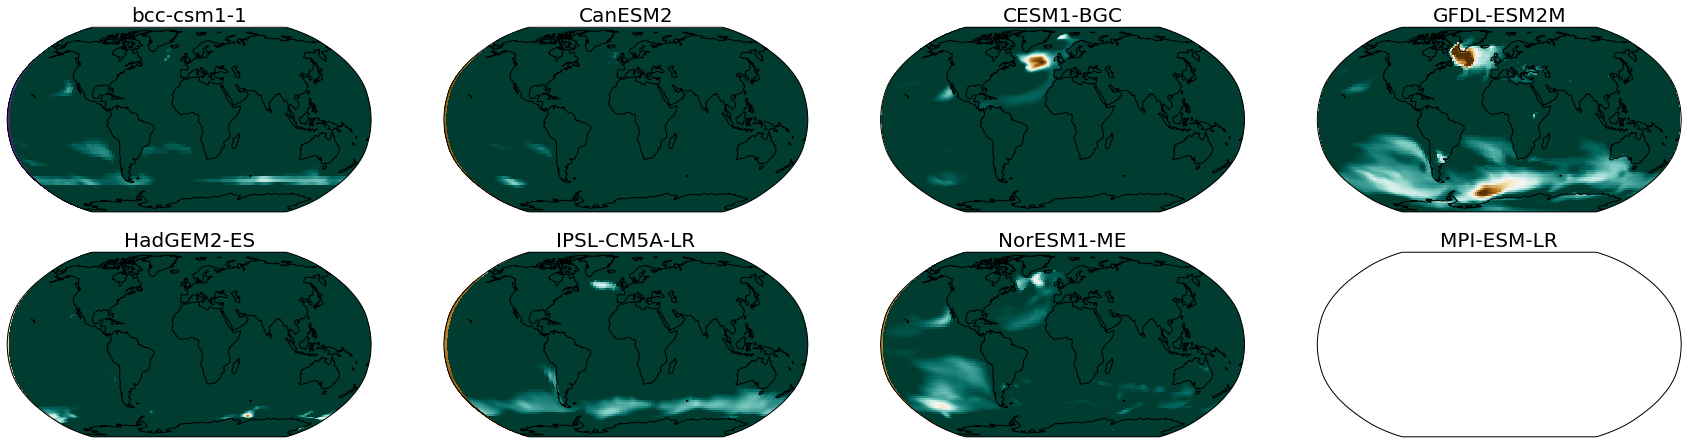

In [15]:
#Runname order: ['1pctCO2-rad','1pctCO2-bgc','1pctCO2','piControl']
[fig,
 mapdata_all,
 latdata_all,
 londata_all] = plot_allmaps_run.plot_allmaps_run(runname_inds=[2,3],
                                                  varname=VARNAME,
                                                  end_yr=END_YR,
                                                  clim=[-1,1],
                                                  unitname=None,
                                                  cmap=plt.cm.BrBG,
                                                  filename= DIR_FIGURES+'Maps_rsdscs_'+str(END_YR)+'yr',
                                                  mask_type=None,
                                                  show_fig = True)

### Zonal Mean

In [49]:
from plants_and_TCR.analyze_data import ET_stats
from plants_and_TCR.process_data import make_processed_data_dict
PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
DIR_FIGURES = directory_information.DIR_OUTPUT_FIGURES

In [56]:
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=['1pctCO2', '1pctCO2-rad'],
                                                                        varname=VARNAME,
                                                                        cdict_names=['CMIP5','CMIP6'],
                                                                        input_path=PATH_REGRIDDED_DATA)

ds_all = ET_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                               varname=VARNAME,
                                               end_yr=130,
                                               runname_inds=[2,0],
                                               cmip_names=['CMIP5','CMIP6'],
                                               delta_or_baseline='Delta')

In [67]:
ds_all.rolling(lat=5, center=True).mean()

<xarray.Dataset>
Dimensions:        (lat: 192, lon: 288, modelname: 20, time: 240)
Coordinates:
  * lat            (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon            (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    height         float64 2.0
  * modelname      (modelname) object 'bcc-csm1-1' 'CanESM2' ... 'ACCESS-ESM1-5'
  * time           (time) int64 0 1 2 3 4 5 6 7 ... 233 234 235 236 237 238 239
Data variables:
    area_weights   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    land_weights   (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ocean_weights  (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    da_area        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    da_land        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    da_glac        (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    tas            (time, lat, lon, modelname) float64 nan nan nan ... nan nan
    da_ocean       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [57]:
ds_all['da_ocean'] = 100-ds_all['da_land']

In [58]:
ds = all_models_delta
varname = VARNAME
units=''

In [72]:
colors=get_CMIP_info.get_colors('CMIP5and6') #[cmip6_start_ind:cmip6_end_ind]
linestyles=get_CMIP_info.get_line_style('CMIP5and6')

def format_subplot(term,colors=None,legend_on=True):
    plt.plot(xlims,[0,0],'-k')
    land_frac = (ds['da_land']/100)*(1-(ds['da_glac']/100))
    ocean_frac = (ds['da_ocean']/100)
    for i in range(0,len(term['modelname'].values)):
        mapdata_mmean=term.isel(modelname=[i]).mean(dim=['modelname'])
        
        land_mmean=mapdata_mmean*land_frac
        land_mmean=land_mmean.where(land_frac>land_frac_cutoff)
        land_mmean_zonal = land_mmean.mean(dim='lon')
        #land_mmean_zonal=land_mmean_zonal.rolling(lon=5, center=True).mean()
        
        ocean_mmean=mapdata_mmean*ocean_frac
        ocean_mmean=ocean_mmean.where(ocean_frac>land_frac_cutoff)
        ocean_mmean_zonal = ocean_mmean.mean(dim='lon')
        #ocean_mmean_zonal=ocean_mmean_zonal.rolling(lon=5, center=True).mean()
        
        land_ocean_contrast = land_mmean_zonal - ocean_mmean_zonal
        
        lats = mapdata_mmean['lat']
        lstyle = linestyles[i]
        plt.plot(lats,land_ocean_contrast,color=colors[i],linestyle=lstyle,linewidth=lwidth, label=term['modelname'][i].values)
    plt.xlim(xlims)
    ax.yaxis.grid()

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_v3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/disk/p/czarakas/anaconda3/env

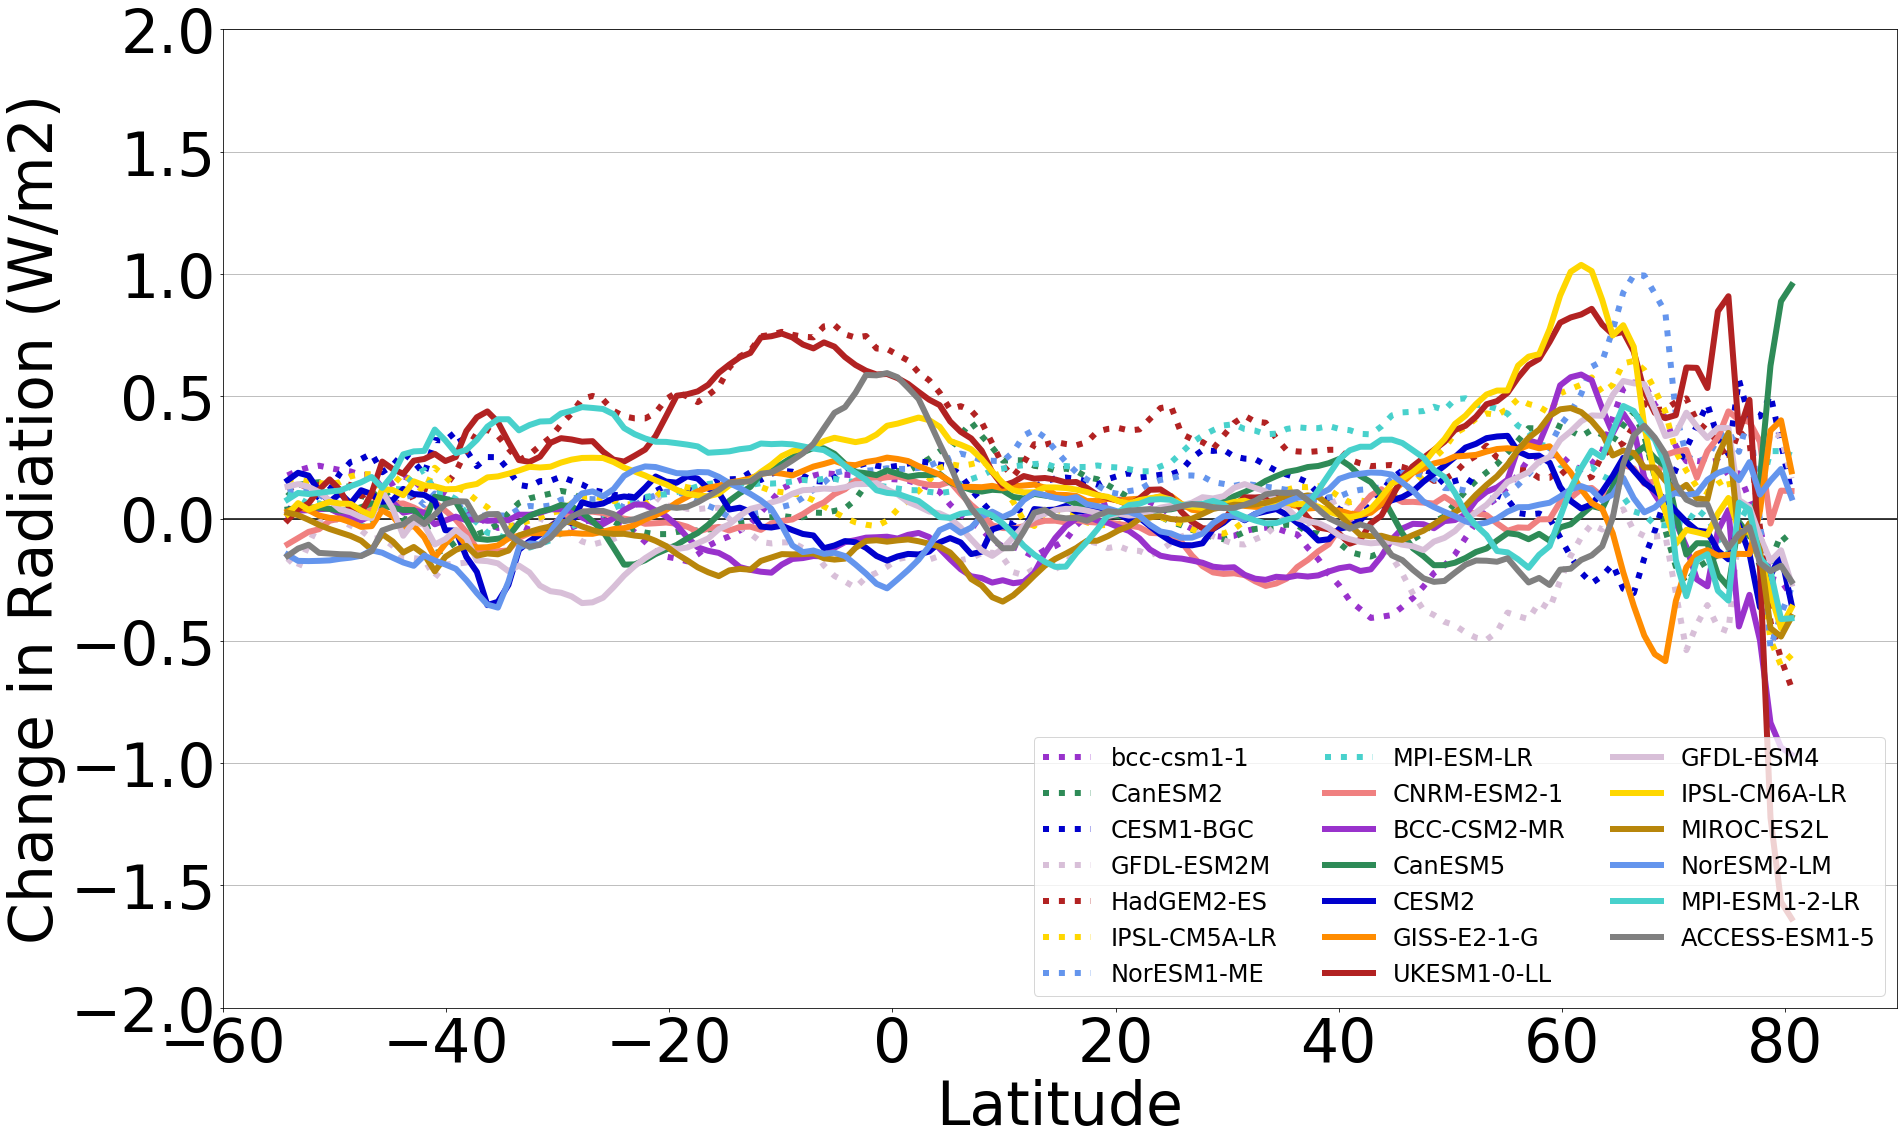

In [73]:
fig, ax = plt.subplots(figsize=(30,18))

cmip6_start_ind=8;
cmip6_end_ind=20;
xlims = [-60,90]
lwidth = 6
FONTSIZE = 60
land_frac_cutoff = 0.8
    
#term = ds[varname].isel(modelname=range(cmip6_start_ind, cmip6_end_ind)).mean(dim=['time'])
term = ds[varname].mean(dim=['time'])
lats = term['lat']
land_frac = (ds['da_land']/100)*(1-(ds['da_glac']/100))
    
    
# calculate and filter multi-model mean
#mapdata_mmean=term.mean(dim=['modelname'])
#mapdata_mmean=mapdata_mmean.where(abs(mapdata_mmean)<10)*land_frac
#mapdata_mmean=mapdata_mmean*land_frac
#mapdata_mmean=mapdata_mmean.where(land_frac>land_frac_cutoff)

#plot multimodel mean
#plt.plot(lats,mapdata_mmean.mean(dim='lon'),label='Multi-Model Mean',
#         linestyle='-',color='black',linewidth=lwidth*3,alpha=0.5)

# plot individual models
format_subplot(term,colors,legend_on=True)

plt.ylabel('Change in Radiation (W/m2)')
    
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
          ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(FONTSIZE)

plt.xlabel('Latitude')

plt.legend(fontsize=FONTSIZE*0.4,ncol=3)
plt.rcParams['legend.loc'] = 'lower right'
plt.ylim([-2,2])
fig.savefig(DIR_FIGURES+'zonal_mean_allmodels_'+VARNAME+'.png', bbox_inches='tight')